# Project: Investigating the TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset selected is the TMDB Dataset from Kaggle. It is a dataset that could potentially give us a recipe for a good movie- or at least the "ingredients required" - what should be in place for a good movie. The dataset contains movies for a range of years with features such as genres,cast, directors, budget and revenue garnered.

The questions that this notebook will be tackling are:
* Does the budget affect popularity?
* Does budget affect revenue?
* Does the movie runtime affect it's popularity?
* Which genres are the most popular genres of all time?
* What are the most profitable genres?
* Which were the most profitable genres made?
* Are the best directors the ones who have produced more movies?

In [100]:
# The imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [101]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Loading the data
df = pd.read_csv('tmdb-movies.csv')

A summary of the columns the dataset has.

In [102]:
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


Investigate the number of rows and columns

In [103]:
# Shape
df.shape

(10866, 21)

Finding out how many columns have missing entries.
If a column is missing over 70% of it's data, it would make sense to drop it.
This code `df.isna().sum().max()/ df.shape[0]` reveals the row with over 72% entries in the column - homepage are missing

In [104]:
# Missing values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Here we check for any duplicates.

In [105]:
# Check for Duplicates
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


The cell below gives us statistical overview of the numerical values in the dataset.

According to the data, there seem to be movies made that had no bugdets to them, not did they have any run times. This is highly unlikely that a movie would luck funding and would have zero minutes of airplay.

This is general information on all the columns in the TMDB Dataset like the data types and number of non-null entries in each column.

In [106]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


A Histogram of all the numeric features

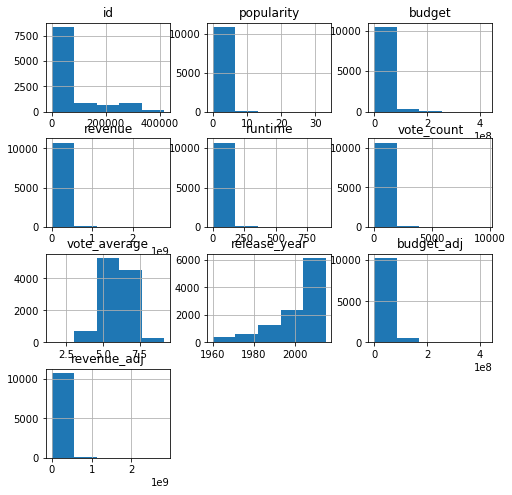

In [107]:
df.hist(figsize=(8,8), bins=5);

<a id='cleaning'></a>
### Data Cleaning

We drop any duplicates.

In [108]:
df.drop_duplicates(inplace=True)

A check to ensure there are no duplicated entries.

In [109]:
df.duplicated().sum()

0

One of the problems we have encountered is that there are movies that have 0 runtime minutes - this could be because the data is not complete. We can drop these entries/records.

In [110]:
runtime_drop_index = df[df.runtime == 0].index
df.drop(runtime_drop_index, inplace=True)

Check there are no zero-minute movies

In [111]:
df[df.runtime == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<a id='eda'></a>
## Exploratory Data Analysis


### Does the budget affect revenue?

In [112]:
# A function to plot out scatter graphs
def plot_scatter(dataframe, x_feature, y_feature,title,figsize=(8,8), legend=True):
    """
    This function will produce scatter plots.
    """
    plot = dataframe.plot.scatter(x=x_feature, y=y_feature, title=title, figsize=figsize, legend=legend);
    return plot

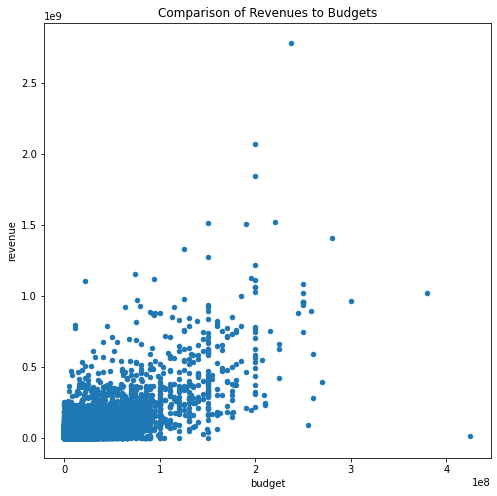

In [113]:
plot_scatter(df, 'budget', 'revenue', title="Comparison of Revenues to Budgets");

We can see that there is a positive correlation between revenue and budget, but there is a high density in the lower regions of the graph meaning there a high budget does not necessarily mean there will be high revenues.



### Does the budget affect popularity?

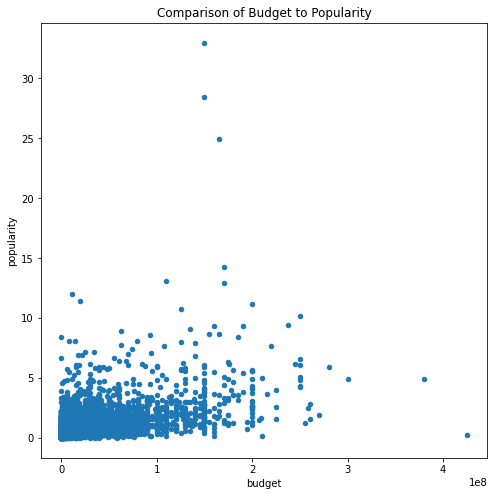

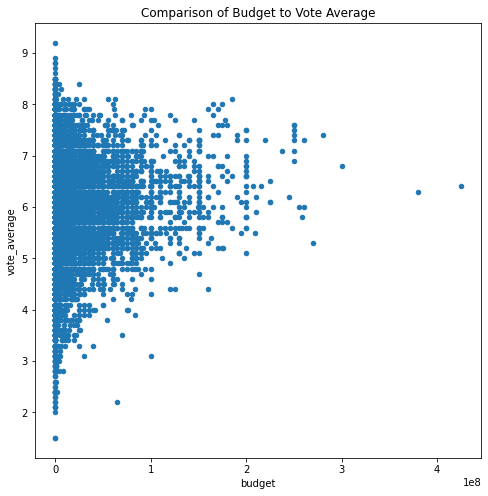

In [114]:
plot_scatter(df, 'budget', 'popularity',title="Comparison of Budget to Popularity");
plot_scatter(df, 'budget', 'vote_average',title="Comparison of Budget to Vote Average");

This shows us that a higher budget doesn't necessarily mean that there will be higher returns or it will be more popular. There may be some outliers in the dataset but in general the norm shows an adequate budget produces an almost equal revenue and popularity score. This must mean a good movie comes from more than just a higher budget.

### Does the movie runtime affect it's popularity?

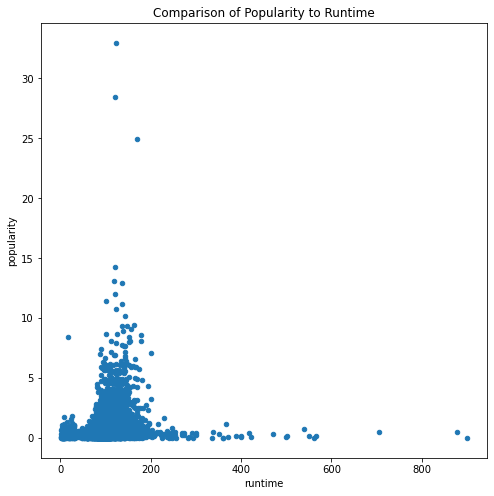

In [115]:
plot_scatter(df, 'runtime', 'popularity', title="Comparison of Popularity to Runtime");

The most popular movies were approximately between 100 and 150 minutes.

### What are the most popular genres of all time?

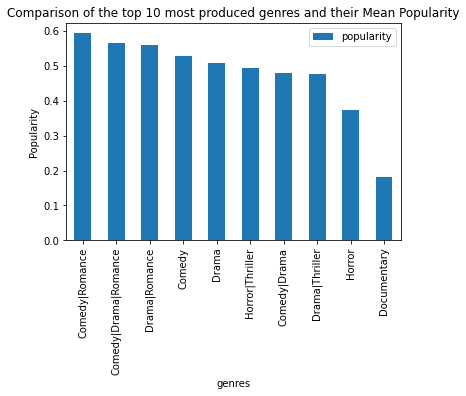

In [116]:
# Find the 10 ten most produced genres
genre_mask = df.genres.value_counts().sort_values(ascending=False)[:10]

# A list of the top ten genres
highest_count_genres = []
for i, v in enumerate(genre_mask.index):
    highest_count_genres.append(v)

# Popularity Mean of the 10 most produced genres
genre_popularity_means = df[df.genres.isin(highest_count_genres)].groupby('genres').popularity.mean().sort_values(ascending=False)

# A bar plot of the 10 genres and the mean popularity
genre_popularity_means.plot.bar(
    title="Comparison of the top 10 most produced genres and their Mean Popularity",
    ylabel="Popularity",
    legend=True
    );

The most popular genres of all time are Comedy/Romance closely followed by Comedy/Drama/Romance. The least popular genre in the scale of most made movies were Documentaries.

### What are the most profitable genres?

In [117]:
# The mean revenues per genre for the 10 most produced movie genres
genre_revenues = df[df.genres.isin(highest_count_genres)].groupby('genres').revenue.mean().reset_index(name='mean_revenue_per_genre').sort_values(by='mean_revenue_per_genre', ascending=False)
# The mean budgets per genre for the 10 most produced movie genres
genre_budgets = df[df.genres.isin(highest_count_genres)].groupby('genres').budget.mean().reset_index(name='mean_budget_per_genre').sort_values(by='mean_budget_per_genre', ascending=False)

# Merge the Mean Revenues with the Mean Budgets for the 10 most produced genres
genre_result = pd.merge(left=genre_revenues, right=genre_budgets, on='genres')

# Creating the Profit Column
genre_result['profit'] = genre_result.apply(lambda x: x.mean_revenue_per_genre - x.mean_budget_per_genre, axis=1)

# Creating the Gross Profit Margin Column
genre_result['gross_profit_margin'] = genre_result.apply(lambda x: x.profit/ x.mean_revenue_per_genre, axis=1)

genre_result

,genres,mean_revenue_per_genre,mean_budget_per_genre,profit,gross_profit_margin
0,Comedy|Romance,4.308106e+07,1.273719e+07,3.034387e+07,0.704344
1,Comedy|Drama|Romance,3.266295e+07,1.083564e+07,2.182731e+07,0.668259
2,Comedy,2.866557e+07,9.541914e+06,1.912366e+07,0.667130
3,Drama|Romance,2.352288e+07,9.356011e+06,1.416687e+07,0.602259
4,Drama,2.121845e+07,8.128220e+06,1.309023e+07,0.616927
5,Comedy|Drama,1.732820e+07,7.171704e+06,1.015649e+07,0.586125
6,Horror|Thriller,1.511773e+07,4.712405e+06,1.040532e+07,0.688286
7,Drama|Thriller,1.360172e+07,9.677971e+06,3.923750e+06,0.288475
8,Horror,1.149458e+07,2.649266e+06,8.845311e+06,0.769520
9,Documentary,1.623616e+06,2.917921e+05,1.331824e+06,0.820283


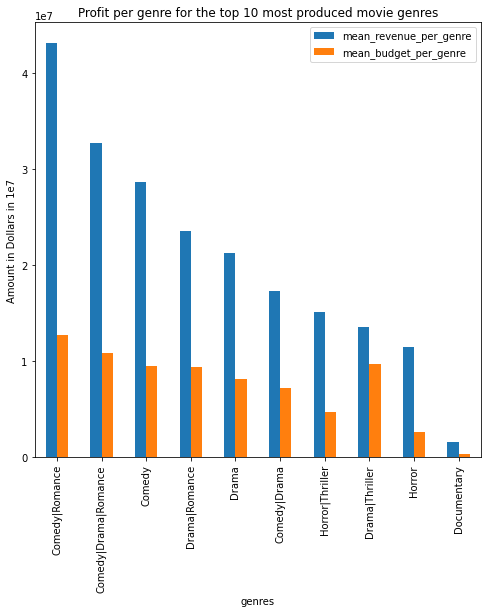

In [118]:
# A Bar Graph comparing Mean Revenues and Mean Budgets for the 10 most produced movie genres
genre_result[['genres','mean_revenue_per_genre', 'mean_budget_per_genre']].plot.bar(
    x='genres', 
    title='Profit per genre for the top 10 most produced movie genres', 
    ylabel='Amount in Dollars in 1e7',
    figsize=(8,8)
);

The Comedy/Romance genre had the highest profit while the Documentary genre made the least profit.

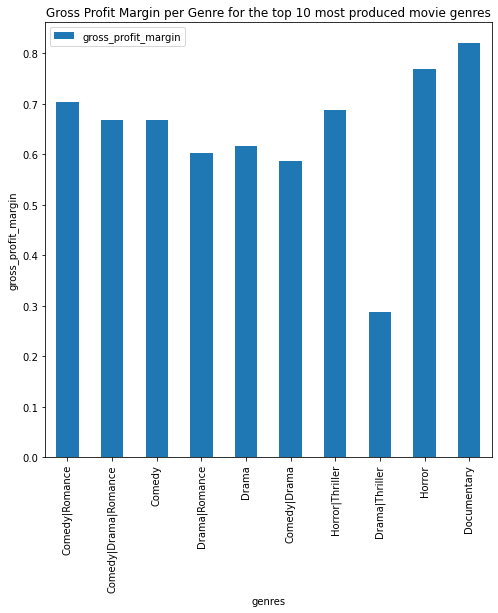

In [119]:
# A bar graph of the Gross profit margin per genre for the top 10 most produced movie genres
genre_result[['genres', 'gross_profit_margin']].plot.bar(
    x='genres', 
    ylabel='gross_profit_margin', 
    title="Gross Profit Margin per Genre for the top 10 most produced movie genres",
    figsize=(8,8)
);


However, the Documentary Genre produced had the highest profit margin, followed by Horror Genre. The poorest profit margin came from Drama Thriller.

 ### Are the best directors the ones who have produced more movies?

In [120]:
# Directors and the profitability of the movies

# A list of the top 10 directors according to the number of movies made by each one
directors_list = []
directors_mask = df.groupby('director').original_title.count().sort_values(ascending=False)[:10]
for i, v in enumerate(directors_mask.index):
    directors_list.append(v)
directors_list

# A Series listing the mean revenue according to the director
director_revenues = df[df.director.isin(directors_list)].groupby('director').revenue.mean().sort_values(ascending=False)

# A Series listing the mean budget according to the director
director_budget = df[df.director.isin(directors_list)].groupby('director').budget.mean().sort_values(ascending=False)

# A table merging the mean revenue and mean budget per director 
result = pd.merge(left=director_revenues, right=director_budget, on='director')

# Profit per Director
result['profit'] = result.apply(lambda x: x.revenue - x.budget, axis=1)

# Gross Profit per Director
result['gross_profit_margin'] = result.apply(lambda x: x.profit / x.revenue, axis=1)

result

,revenue,budget,profit,gross_profit_margin
director,,,,
Steven Spielberg,3.109850e+08,5.482586e+07,2.561591e+08,0.823703
Ridley Scott,1.586955e+08,6.447391e+07,9.422159e+07,0.593726
Ron Howard,1.583851e+08,5.500000e+07,1.033851e+08,0.652745
Steven Soderbergh,9.815371e+07,3.447727e+07,6.367644e+07,0.648742
Clint Eastwood,8.308445e+07,2.437426e+07,5.871018e+07,0.706633
Joel Schumacher,7.263603e+07,3.121429e+07,4.142174e+07,0.570264
Martin Scorsese,6.783605e+07,3.205862e+07,3.577742e+07,0.527410
Barry Levinson,6.182494e+07,2.526316e+07,3.656179e+07,0.591376
Brian De Palma,5.125586e+07,2.781500e+07,2.344086e+07,0.457330


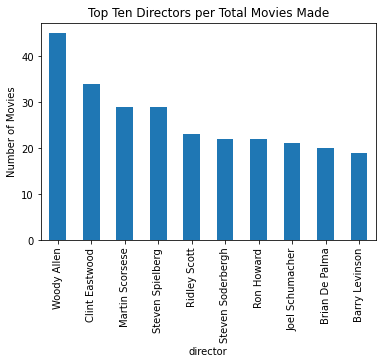

In [121]:
# Bar chart of directors who have made a lot of movies

# Find the top ten directors according to the number of movies made
directors = df.groupby('director').original_title.count().sort_values(ascending=False).head(10)
# Bar chart
directors.plot.bar(title='Top Ten Directors per Total Movies Made', ylabel='Number of Movies');

At a snapshot we can see that Woody Allen has made the most movies while Barry Levinson has made the least.
However, we cannot conclusively decide that they are the best directors based on the total number of movies made.

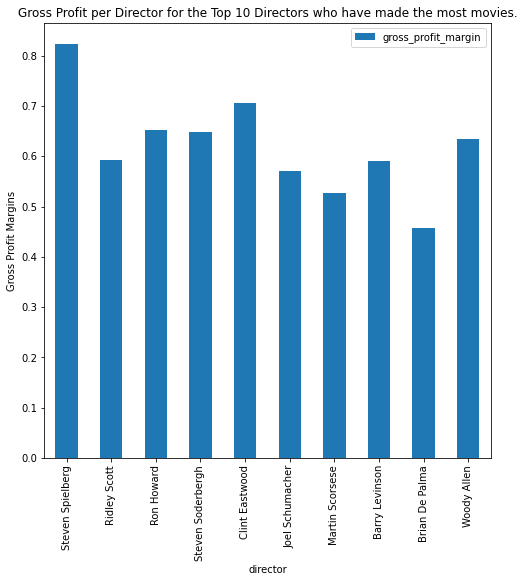

In [122]:
# Gross Profit per director
result['gross_profit_margin'].plot.bar(
    title="Gross Profit per Director for the Top 10 Directors who have made the most movies.",
    figsize=(8,8),
    ylabel="Gross Profit Margins",
    legend=True
);

Although Woody Allen has made the most movies, this does not translate that he had a higher profit margin.

<a id='conclusions'></a>
## Conclusions

The conclusions we can derive from the Explarotary Dataframe Analysis are as follows:
1. Budget and Revenue

    There is a positive correlation but does not necessarily mean that the revenues scale up with a higher budget.
    
    
2. Budget and Popularity

    There is a weak positive correlation here. This means that a higher budget will not always garner a popular vote from the masses.
    
    
3. Popularity and Movie Runtimes
    
    The most popular movies were not the extremely short or extremely long movies. The range of runtime minutes that were considered popular were between 100 and 150 minutes.
    
    
4. Popularity and the top 10 most produced genres

    The graphics above provide that the most favoured movies by the people was Comedy/Romance Genres, while - although widely produced - documentaries were not well received/popular
    
    
5. The top 10 most produced genres and Profits and Gross Profit Margins
    
    We can conclude that we can not just use profit as an absolute measure of the return per dollar invested. Some less popular genres might give you a higher profit margin than others
    
    
6. The top 10 most produced genres and the top 10 Directors who have made a lot of movies

    Directors who have made the most movies have not proved to be the ones who make the most profit. We should investigate the profit margin to find out who makes the most out of each dollar invested.


### Limitations
The TMDB Dataset contained alot of incosistencies in some fields such as having 0's in the budget and revenue features, or movies that had 0 minute runtimes. The inaccurate data here would distort the descriptive statistics, and dropping all the 0 based records would have highly affected the size of the data. More investigation should be conducted to ensure that the inaccurate data is reconciled and recorded, to make the project more accurate and reflective of the actual situation.

More investigations should be made using machine learning tools to ensure that we get an accurate situation and help predict the future of movies or the necessary requirements for a good movie. 

More features could be added to ensure we have a deeper analysis of the requirements of a good movie. Some questions that would guide the additional information would be "Does the quality of the script or the script writters' work affect popularity?", "Does the crew used in making a movie making it more or less profitable or popular?"

**Please note**

The results above are not conclusive and no concrete statistical conclusions should be inferred from the data above.

Any correlation should not be inferred to causality with respect to this project.